<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

In this exploratory study, we deep dive into the 2017 and 2019 datasets to study how participation rates and test scores in SAT and ACT have changed at the state-level. The findings from this exploratory study serve to identify:

- **States with scope for increase in participation rates in the future.** This could apply to states with i) an increased participation in SAT and ii) a decreased participation rate for ACT in 2019.
- **States with low average SAT total score.** It will be useful to identify such states so that College Board can better target marketing and/or partnership efforts to improve students' access to the test preparation materials in the relevant states. This effort is aligned with College Board's mandate to expand students' access to higher education. 

## Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Recommendations](#Recommendations)

### Background

College Board is an American nonprofit organisations formed to expand access to higher education. It develops and administers SAT, a standardised test, to promote college-readiness as part of the college admission process ([*source*](https://en.wikipedia.org/wiki/College_Board)). 

Apart from the SAT, ACT is another major standardized test administered by Act Inc to assess high school students' academic achievement and college readiness. 

Students' test scores from either ACT and/or SAT are used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). Students who fare better on the tests would obtain higher scores. Both tests have different score ranges as listed below:
* SAT total scores range from 400 to 1,600 
* ACT composite scores range from 1 to 36


**Market Share of SAT and ACT from pre-1900 to 2018:**
![Test Market Share](ACT_vs_SAT.jpg)

> #### As of 2019, the SAT is officially more popular than the ACT with 55% of the market share. More than 2.2 million students in the class of 2019 took the SAT compared to about 1.8 million students who took the ACT ([*source*](https://theolivebook.com/sat-vs-act-which-is-more-popular/)). 

The increase in market share enjoyed by SAT in years leading up to 2019 may be attributed to SAT's efforts to revamp its test contents. At the same time, SAT's partnership with Kahn Academy to offer free test preps and increased direct-to-state marketing efforts have also seemed to pay off. By 2018, College Board had won ten state contracts, including three formerly held by ACT ([*source*](https://www.zippia.com/college-board-careers-19597/history/)). State partnerships are crucial in influence the state participation rates in both standardised tests. State policies, in terms of mandating the standardised test(s) or providing the test for free can affect the test participation rates significantly.

### Data

We use the following datasets to study how participation rates and mean scores for SAT and ACT have changed across various states from 2017 and 2019. 

State-level ACT participation rates and mean scores data
* [`act_2017.csv`](./data/act_2017.csv)
* [`act_2019.csv`](./data/act_2019.csv)

State-level SAT participation rates and mean scores data
* [`sat_2017.csv`](./data/sat_2017.csv)
* [`sat_2019.csv`](./data/sat_2019.csv)

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def average(args):
    return (sum(args) / len(args))

In [2]:
average([10,100,70])

60.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def std_dev(args):
    avg = average(args)
    x = 0
    for arg in args:
        x += (arg - avg)**2 
    variance = x / len(args)
    std_dev = variance**(0.5)
    return std_dev

In [4]:
std_dev([10,100,70])

37.416573867739416

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
def str_to_float(x):
    if type(x) == str and "%" in x:
            x = x.replace("%", "")
            x = float(x) / 100
            return x 
    else: 
        return print(x)

In [6]:
str_to_float("30.5%")

0.305

--- 
# Part 2
---

In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Data Import and Cleaning 
### Importing the SAT and ACT data by State from 2017 and 2019

In [8]:
### Loading the relevant datasets 

act_2019 = pd.read_csv("data/act_2019.csv")
act_2017 = pd.read_csv("data/act_2017.csv")
sat_2019 = pd.read_csv("data/sat_2019.csv")
sat_2017 = pd.read_csv("data/sat_2017.csv")

In [9]:
### Drop unecessary columns or rename column(s) 

act_2017.drop(["English", "Math", "Reading", "Science"], axis=1, inplace=True)
sat_2019.drop(["EBRW", "Math"], axis=1, inplace=True)
sat_2019.rename(columns={"Participation Rate": "Participation"}, inplace=True)
sat_2017.drop(["Evidence-Based Reading and Writing", "Math"], axis=1, inplace=True)

In [10]:
### Merge files and format column headers

sat = pd.merge(sat_2019, sat_2017, on="State", how="outer")
act = pd.merge(act_2019, act_2017, on="State", how="outer")

In [11]:
### Rename columns for ease of interpretation

sat.rename(columns={
    "State" : "state",
    "Participation_x": "participation_19", 
    "Total_x": "sat_avg_total_19",
    "Participation_y": "participation_17", 
    "Total_y": "sat_avg_total_17"}, inplace=True)

act.rename(columns={
    "State" : "state",
    "Participation_x": "participation_19", 
    "Composite_x": "act_avg_composite_19",
    "Participation_y": "participation_17", 
    "Composite_y": "act_avg_composite_17"}, inplace=True)

### Format the state values in a similar way 

sat["state"] = sat["state"].str.title()
act["state"] = act["state"].str.title()

### Cleaning for SAT data from 2017 and 2019

In [12]:
sat.head()

,state,participation_19,sat_avg_total_19,participation_17,sat_avg_total_17
0,Alabama,7%,1143,5%,1165.0
1,Alaska,41%,1097,38%,1080.0
2,Arizona,31%,1134,30%,1116.0
3,Arkansas,6%,1141,3%,1208.0
4,California,63%,1065,53%,1055.0


In [13]:
### Check for null values
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             53 non-null     object 
 1   participation_19  53 non-null     object 
 2   sat_avg_total_19  53 non-null     int64  
 3   participation_17  51 non-null     object 
 4   sat_avg_total_17  51 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ KB


In [14]:
sat["sat_avg_total_17"] = sat["sat_avg_total_17"].astype('Int64')

In [15]:
### Change str(%) to float

sat["participation_19"] = sat["participation_19"].map(str_to_float)
sat["participation_17"] = sat["participation_17"].map(str_to_float)

—
—
nan
nan


In [16]:
sat.loc[sat["participation_19"].isna()==True]

,state,participation_19,sat_avg_total_19,participation_17,sat_avg_total_17
39,Puerto Rico,NaN,944,NaN,<NA>
47,Virgin Islands,NaN,935,NaN,<NA>


In [17]:
sat.loc[sat["state"] == "District Of Columbia"]

,state,participation_19,sat_avg_total_19,participation_17,sat_avg_total_17
8,District Of Columbia,0.94,975,1.0,950


In [18]:
### Drop Virgin Islands & Puerto Rico rows due to:
# 1) missing data
# 2) equivalent data not available in other years 

## Drop District of Columbia 
# the state has since been renamed to Washington since 1900 

sat = sat.drop([8,39,47], axis=0)

In [19]:
# Reorder columns for ease of reading 
cols = sat.columns.tolist()
cols = cols[0:1] + cols[3:4] + cols[1:2] + cols[4:] + cols[2:3]
sat = sat[cols]

In [20]:
# Check datatypes to see if there's a need for further cleaning
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 52
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             50 non-null     object 
 1   participation_17  50 non-null     float64
 2   participation_19  50 non-null     float64
 3   sat_avg_total_17  50 non-null     Int64  
 4   sat_avg_total_19  50 non-null     int64  
dtypes: Int64(1), float64(2), int64(1), object(1)
memory usage: 2.4+ KB


### Cleaning for ACT data from 2017 and 2019

In [21]:
act.head()

,state,participation_19,act_avg_composite_19,participation_17,act_avg_composite_17
0,Alabama,100%,18.9,100%,19.2
1,Alaska,38%,20.1,65%,19.8
2,Arizona,73%,19.0,62%,19.7
3,Arkansas,100%,19.3,100%,19.4
4,California,23%,22.6,31%,22.8


In [22]:
### Check for null values
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 52 non-null     object 
 1   participation_19      52 non-null     object 
 2   act_avg_composite_19  52 non-null     float64
 3   participation_17      52 non-null     object 
 4   act_avg_composite_17  52 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.4+ KB


In [23]:
### Change str(%) to float 
act["participation_19"] = act["participation_19"].map(str_to_float)
act["participation_17"] = act["participation_17"].map(str_to_float)

In [24]:
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 52 non-null     object 
 1   participation_19      52 non-null     float64
 2   act_avg_composite_19  52 non-null     float64
 3   participation_17      52 non-null     float64
 4   act_avg_composite_17  52 non-null     object 
dtypes: float64(3), object(2)
memory usage: 2.4+ KB


In [25]:
### Check state data to find out why there are more than 50 states
act["state"].unique() 

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'National'], dtype=object)

In [26]:
act.loc[act["state"] == "National"]

,state,participation_19,act_avg_composite_19,participation_17,act_avg_composite_17
51,National,0.52,20.7,0.6,21.0


In [27]:
act.loc[act["state"] == "District Of Columbia"]

,state,participation_19,act_avg_composite_19,participation_17,act_avg_composite_17
8,District Of Columbia,0.32,23.5,0.32,24.2


In [28]:
### Drop National as it is not a state
### Drop DOC as it has been renamed to Washington
act = act.drop([8,51], axis=0)

In [29]:
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 50 non-null     object 
 1   participation_19      50 non-null     float64
 2   act_avg_composite_19  50 non-null     float64
 3   participation_17      50 non-null     float64
 4   act_avg_composite_17  50 non-null     object 
dtypes: float64(3), object(2)
memory usage: 2.3+ KB


In [30]:
### Generate unique values to find why composite score is not stored as float
act["act_avg_composite_17"].unique()

array(['19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2', '24.1',
       '21.4', '19.0', '22.3', '22.6', '21.9', '21.7', '20.0', '19.5',
       '24.3', '23.6', '25.4', '21.5', '18.6', '20.4', '20.3', '17.8',
       '25.5', '23.9', '24.2', '19.1', '22.0', '21.8', '23.7', '24.0',
       '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [31]:
### Correct data error 
act = act.replace("20.2x", 20.2)

In [32]:
### Convert all ACT score data to floats 
act["act_avg_composite_17"] = act["act_avg_composite_17"].map(lambda x: float(x))

In [33]:
# Reorder columns for ease of reading 
cols = act.columns.tolist()
cols = cols[0:1] + cols[3:4] + cols[1:2] + cols[4:] + cols[2:3]
act = act[cols]

In [34]:
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 50 non-null     object 
 1   participation_17      50 non-null     float64
 2   participation_19      50 non-null     float64
 3   act_avg_composite_17  50 non-null     float64
 4   act_avg_composite_19  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


### Further cleaning to add feature for EDA

In [35]:
### Add dummy variable = 1 if participations in both years = 100%
### Add dummy variable = 1 if participation decreased in 2019
### Add variable to measure change in participation

act["100%_part"] = ((act["participation_19"]==1) & (act["participation_17"]==1)).astype(int)
act["decrease_participation"] = (act["participation_19"] < act["participation_17"]).astype(int)
act["change_in_part"] = (act["participation_19"] - act["participation_17"]).astype(float)
act["more_than_50%_part"] = ((act["participation_19"]>=0.5) & (act["participation_17"]>=0.5)).astype(int)
act.head()


,state,participation_17,participation_19,act_avg_composite_17,act_avg_composite_19,100%_part,decrease_participation,change_in_part,more_than_50%_part
0,Alabama,1.00,1.00,19.2,18.9,1,0,0.00,1
1,Alaska,0.65,0.38,19.8,20.1,0,1,-0.27,0
2,Arizona,0.62,0.73,19.7,19.0,0,0,0.11,1
3,Arkansas,1.00,1.00,19.4,19.3,1,0,0.00,1
4,California,0.31,0.23,22.8,22.6,0,1,-0.08,0


In [36]:
sat["100%_part"] = ((sat["participation_19"]==1) & (sat["participation_17"]==1)).astype(int)
sat["decrease_participation"] = (sat["participation_19"] < sat["participation_17"]).astype(int)
sat["change_in_part"] = (sat["participation_19"] - sat["participation_17"]).astype(float)
sat["more_than_50%_part"] = ((sat["participation_19"]>=0.5) & (sat["participation_17"]>=0.5)).astype(int)
sat.head()

,state,participation_17,participation_19,sat_avg_total_17,sat_avg_total_19,100%_part,decrease_participation,change_in_part,more_than_50%_part
0,Alabama,0.05,0.07,1165,1143,0,0,0.02,0
1,Alaska,0.38,0.41,1080,1097,0,0,0.03,0
2,Arizona,0.30,0.31,1116,1134,0,0,0.01,0
3,Arkansas,0.03,0.06,1208,1141,0,0,0.03,0
4,California,0.53,0.63,1055,1065,0,0,0.10,1


In [37]:
### Reset index & save cleaned datasets
sat = sat.reset_index(drop=True)
sat.to_csv("sat.csv")
act.to_csv("act.csv")

In [38]:
### Create merged file for both SAT and ACT with key columns only

sat["test"] = "SAT"
act["test"] = "ACT"

sat_act = pd.concat([sat, act], axis=0, ignore_index=True)
sat_act = sat_act.drop(["100%_part", "decrease_participation", "change_in_part", "change_in_part", "more_than_50%_part"], axis=1)

In [39]:
cols = sat_act.columns.tolist()
cols = cols[0:1] + cols[5:6] + cols[1:5] + cols[6:]
sat_act = sat_act[cols]

In [40]:
sat_act.to_csv("sat and act.csv")

In [41]:
sat_act.head()

,state,test,participation_17,participation_19,sat_avg_total_17,sat_avg_total_19,act_avg_composite_17,act_avg_composite_19
0,Alabama,SAT,0.05,0.07,1165,1143.0,NaN,NaN
1,Alaska,SAT,0.38,0.41,1080,1097.0,NaN,NaN
2,Arizona,SAT,0.30,0.31,1116,1134.0,NaN,NaN
3,Arkansas,SAT,0.03,0.06,1208,1141.0,NaN,NaN
4,California,SAT,0.53,0.63,1055,1065.0,NaN,NaN


### Data Dictionary

**File: act.csv**

Description: Line data showing 2017 and 2019 states' participation rates in ACT and average composite scores by state

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT|This value takes on one of the fifty states in the United States.| 
|participation_17|float|ACT|This refers to the state participation rate for ACT in 2017. This gives us an idea of the reach of the ACT in each state and the size of the population being tested for the corresponding average composite ACT score.| 
|participation_19|float|ACT|This refers to the state participation rate for ACT in 2019.| 
|act_avg_composite_17|float|ACT|This refers to the average ACT composite score for a particular state in 2017. Each individual's composite score is calculated based on the candidate's scores in the respective ACT sections (i.e. English, Math, Reading and Science). The overall composite score ranges between 1 and 36.| 
|act_avg_composite_19|float|ACT|This refers to the average ACT composite score for a particular state in 2019.| 
|100%_part|int|ACT|Dummy variable equals to 1 when state achieved 100% participation rate in both 2017 and 2019.| 
|decrease_participation|int|ACT|Dummy variable equals to 1 when state participation rate in ACT decreased in 2019.| 
|change_in_part|float|ACT| Change in participation rate in 2019 (%-pts).| 


**File: sat.csv**

Description: Line data showing 2017 and 2019 states' participation rates in SAT and average total scores by state

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|This value takes on one of the fifty states in the United States.| 
|participation_17|float|SAT|This refers to the state participation rate for SAT in 2017. This gives us an idea of the reach of the SAT in each state and the size of the population being tested for the corresponding average total SAT score.| 
|participation_19|float|SAT|This refers to the state participation rate for SAT in 2019. | 
|sat_avg_total_17|int|SAT|This refers to the average total SAT score for a particular state in 2017. Each individual's total SAT score is calculated based on the candidate's scores in the respective SAT sections (i.e. Evidence-Based Reading and Writing and Math). The total SAT score ranges between 400 and 1600.| 
|sat_avg_total_19|int|SAT|This refers to the average total SAT score for a particular state in 2019.| 
|100%_part|int|SAT|Dummy variable equals to 1 when state achieved 100% participation rate in both 2017 and 2019.| 
|decrease_participation|int|SAT|Dummy variable equals to 1 when state participation rate decreased in 2019.| 
|change_in_part|float|SAT| Change in participation rate in 2019 (%-pts).| 


**File: sat and act.csv**

Description: Line data showing 2017 and 2019 participation rates and mean scores in SAT and ACT by state

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT & ACT|This value takes on one of the fifty states in the United States.| 
|test|object|SAT & ACT|This value takes on either SAT or ACT.| 
|participation_17|float|SAT & ACT|This refers to the state participation rate for SAT or ACT in 2017. This gives us an idea of the reach of the respective test in each state and the size of the population being tested for the corresponding average score reported.| 
|participation_19|float|SAT & ACT|This refers to the state participation rate for SAT or ACT in 2019.| 
|sat_avg_total_17|int|SAT|This refers to the average total SAT score for a particular state in 2017. Each individual's total SAT score is calculated based on the candidate's scores in the respective SAT sections (i.e. Evidence-Based Reading and Writing and Math). The total SAT score ranges between 400 and 1600.| 
|sat_avg_total_19|int|SAT|This refers to the average total SAT score for a particular state in 2019.| 
|act_avg_composite_17|float|ACT|This refers to the average ACT composite score for a particular state in 2017. Each individual's composite score is calculated based on the candidate's scores in the respective ACT sections (i.e. English, Math, Reading and Science). The overall composite score ranges between 1 and 36.| 
|act_avg_composite_19|float|ACT|This refers to the average ACT composite score for a particular state in 2019.| 

## Exploratory Data Analysis

### 1. Summary Statistics 

**Key Observations for SAT**

- The **average SAT participation rate across states increased by 9%-pts in 2019** (up from 39% in 2017).
- The SAT participation rate increased at the 25th, 50th and 75th percentile.
- Compared to 2017, 36 states increased participation in SAT in 2019, while 4 states decreased their participation in SAT.
- 8 states fully participated in SAT in 2019, of which 3 fully participated in 2017 too. 
- In the same time period, the **average SAT total score fell by 14 pts** (down from 1130 in 2017).
- Consistent with the overall decrease in the average SAT total score observed in 2019, we see a decline in mean test score at the 0th, 25th and 50th percentile.

In [42]:
sat[["participation_17", "participation_19", "sat_avg_total_17", "sat_avg_total_19"]].describe().round(2)[1::]

,participation_17,participation_19,sat_avg_total_17,sat_avg_total_19
mean,0.39,0.48,1129.62,1115.84
std,0.35,0.39,89.91,96.14
min,0.02,0.02,996.00,943.00
25%,0.04,0.05,1057.00,1049.00
50%,0.34,0.52,1107.50,1098.50
75%,0.65,0.82,1214.00,1215.00
max,1.00,1.00,1295.00,1284.00


In [43]:
print(f'{sat["100%_part"].sum()} out of 50 states fully participated in SAT in 2017 and 2019.')
print(f'{sat["decrease_participation"].sum()} out of 50 states decreased participated in SAT in 2019.')

3 out of 50 states fully participated in SAT in 2017 and 2019.
4 out of 50 states decreased participated in SAT in 2019.


In [44]:
sat.loc[sat["100%_part"]==1]["state"]

6     Connecticut
7        Delaware
21       Michigan
Name: state, dtype: object

In [45]:
sat.loc[sat["participation_19"]==1].nunique()

state                     8
participation_17          6
participation_19          1
sat_avg_total_17          7
sat_avg_total_19          8
100%_part                 2
decrease_participation    1
change_in_part            6
more_than_50%_part        2
test                      1
dtype: int64

In [46]:
sat.loc[sat["decrease_participation"]==1]["state"]

10           Hawaii
25          Montana
27           Nevada
28    New Hampshire
Name: state, dtype: object

In [47]:
sat.loc[(sat["participation_17"] < sat["participation_19"])==True]["state"].count()

36

**Key Observations for ACT**

- The **average ACT participation rate across states decreased by 7%-pts in 2019** (down from 66% in 2017).
- The ACT participation rate decreased at the 0th, 25th, 50th percentile. However, at the 75th percentile, we observe 100% participation rate for ACT.
- 4 states increased participation in ACT in 2019, while 32 states decreased ACT participation.
- Compared to 2017, the average ACT composite score remained similar, i.e. it only fell slightly by 0.05 pts in 2019.

In [48]:
act[["participation_17", "participation_19", "act_avg_composite_17", "act_avg_composite_19"]].describe().round(2)[1::]

,participation_17,participation_19,act_avg_composite_17,act_avg_composite_19
mean,0.66,0.59,21.47,21.42
std,0.32,0.35,2.00,2.20
min,0.08,0.06,17.80,17.90
25%,0.31,0.24,19.80,19.80
50%,0.71,0.58,21.40,20.95
75%,1.00,1.00,23.40,23.75
max,1.00,1.00,25.50,25.50


In [49]:
print(f'{act["100%_part"].sum()} out of 50 states have fully participated in ACT in 2017 and 2019.')
print(f'{act["decrease_participation"].sum()} out of 50 states have decreased participated in ACT in 2019.')

13 out of 50 states have fully participated in ACT in 2017 and 2019.
32 out of 50 states have decreased participated in ACT in 2019.


In [50]:
act[act["participation_17"]==1]["state"].count()

17

In [51]:
act[act["participation_19"]==1]["state"].count()

15

In [52]:
act.loc[act["100%_part"]==1]["state"]

0            Alabama
3           Arkansas
17          Kentucky
18         Louisiana
24       Mississippi
26           Montana
28            Nevada
33    North Carolina
36          Oklahoma
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

In [53]:
act.loc[act["decrease_participation"]==1]["state"]

1             Alaska
4         California
5           Colorado
6        Connecticut
7           Delaware
9            Florida
10           Georgia
11            Hawaii
12             Idaho
13          Illinois
14           Indiana
15              Iowa
16            Kansas
19             Maine
21     Massachusetts
22          Michigan
23         Minnesota
25          Missouri
29     New Hampshire
30        New Jersey
31        New Mexico
32          New York
34      North Dakota
38      Pennsylvania
39      Rhode Island
40    South Carolina
41      South Dakota
43             Texas
45           Vermont
46          Virginia
47        Washington
48     West Virginia
Name: state, dtype: object

In [54]:
act.loc[(act["participation_17"] < act["participation_19"])==True]["state"].count()

4

### 2. Using dictionary comprehension 

In [55]:
sat_sd = {
    "participation_17" : std_dev(sat["participation_17"]),
    "participation_19" : std_dev(sat["participation_19"]),
    "sat_avg_total_17" : std_dev(sat["sat_avg_total_17"]),
    "sat_avg_total_19" : std_dev(sat["sat_avg_total_19"])
         }

sat_sd

{'participation_17': 0.3421286307808805,
 'participation_19': 0.38212228409240934,
 'sat_avg_total_17': 89.00941298536914,
 'sat_avg_total_19': 95.17612305615312}

In [56]:
act_sd = {
    "participation_17" : std_dev(act["participation_17"]),
    "participation_19" : std_dev(act["participation_19"]),
    "act_avg_composite_17" : std_dev(act["act_avg_composite_17"]),
    "act_avg_composite_19" : std_dev(act["act_avg_composite_19"])
         }

act_sd

{'participation_17': 0.3178794740149165,
 'participation_19': 0.3430510166141473,
 'act_avg_composite_17': 1.9840977798485642,
 'act_avg_composite_19': 2.175183670405789}

### 3. Trends investigation

### Which states have the highest and lowest participation rates for SAT and ACT in 2019?

In [57]:
# create an index match to allow us to rank the states 
# based on the order for the SAT score plot
sat["order"] =sat["participation_19"].rank(method="first")
act = pd.merge(act, sat[["state", "order"]], how="inner", on="state") 

<ipython-input-58-2a1dcbf5bda6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
<ipython-input-58-2a1dcbf5bda6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sat.sort_values(by=["order"])["state"], rotation=90)
<ipython-input-58-2a1dcbf5bda6>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
<ipython-input-58-2a1dcbf5bda6>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(act.sort_values(by=["order"])["state"], rotation=90);


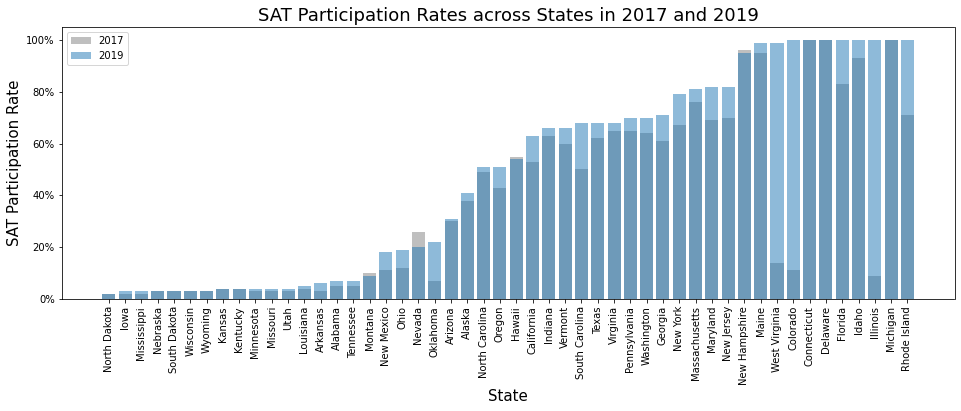

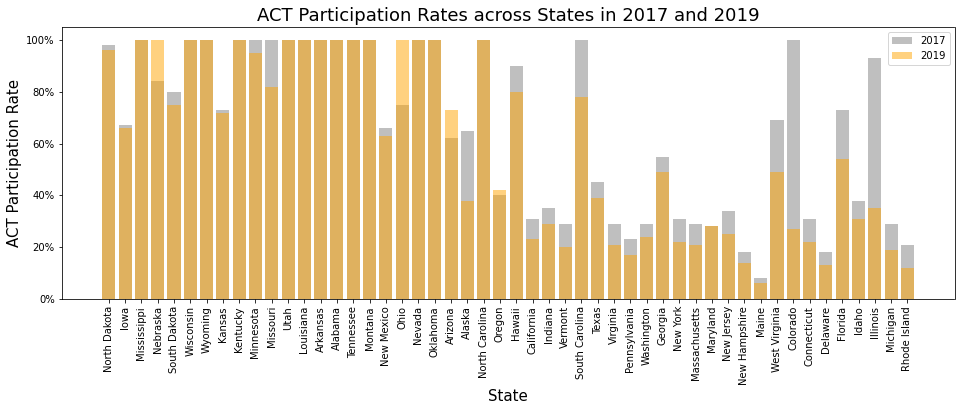

In [58]:
fig, ax = plt.subplots(figsize=(16,5))
ax.bar(sat["state"], sat.sort_values(by=["order"])["participation_17"], color="grey", alpha=0.5, label=2017)
ax.bar(sat["state"], sat.sort_values(by=["order"])["participation_19"], alpha=0.5, label=2019)

ax.set_title("SAT Participation Rates across States in 2017 and 2019", fontsize=18)
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("SAT Participation Rate", fontsize=15)
ax.set_yticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
ax.set_xticklabels(sat.sort_values(by=["order"])["state"], rotation=90)
ax.legend();

fig, ax = plt.subplots(figsize=(16,5))
ax.bar(act["state"], act.sort_values(by=["order"])["participation_17"], color="grey", alpha=0.5, label=2017)
ax.bar(act["state"], act.sort_values(by=["order"])["participation_19"], color="orange", alpha=0.5, label=2019)

ax.set_title("ACT Participation Rates across States in 2017 and 2019", fontsize=18)
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("ACT Participation Rate", fontsize=15)
ax.set_yticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
ax.set_xticklabels(act.sort_values(by=["order"])["state"], rotation=90);
ax.legend();

### Which states have the highest and lowest mean total/composite scores for the SAT and ACT in 2019?


Table featuring state with highest and lowest test scores for SAT and ACT in 2019:

|Test|Highest|Lowest|
|---|---|---|
|SAT|Minnesota|West Virginia|
|ACT|Massachusetts|Nevada|


In [59]:
act.loc[act["act_avg_composite_19"].rank(method="first")==1]["state"]

27    Nevada
Name: state, dtype: object

In [60]:
# create an index match to allow us to rank the states 
# based on the order for the SAT score plot
sat["order_score"] = sat["sat_avg_total_19"].rank(method="first")
act = pd.merge(act, sat[["state", "order_score"]], how="inner", on="state") 

<ipython-input-61-048423028dff>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sat.sort_values(by=["order_score"])["state"], rotation=90)
<ipython-input-61-048423028dff>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(act.sort_values(by=["order_score"])["state"], rotation=90);


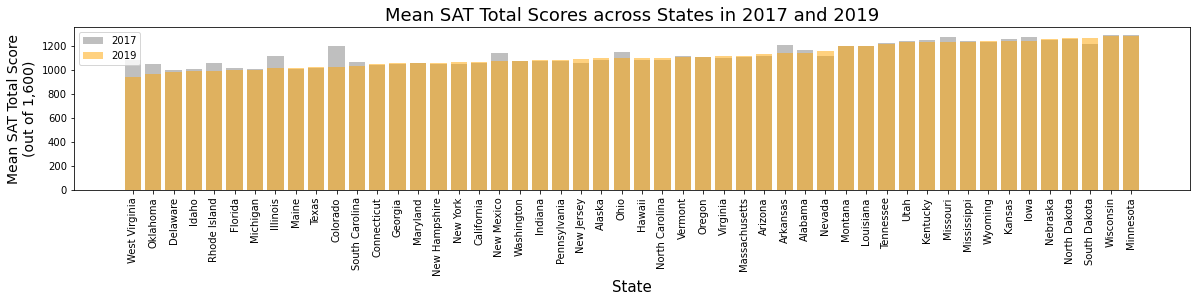

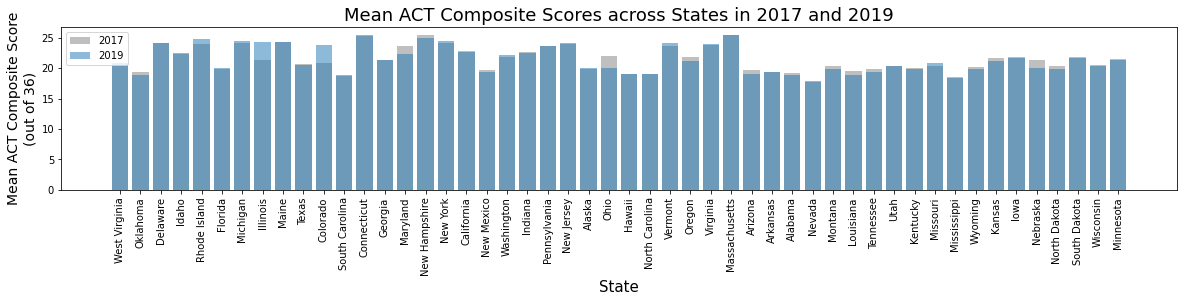

In [61]:
fig, ax = plt.subplots(figsize=(20,3))
ax.bar(sat["state"], sat.sort_values(by=["order_score"])["sat_avg_total_17"], color="grey", alpha=0.5, label=2017)
ax.bar(sat["state"], sat.sort_values(by=["order_score"])["sat_avg_total_19"], color="orange", alpha=0.5, label=2019)

ax.set_title("Mean SAT Total Scores across States in 2017 and 2019", fontsize=18)
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("Mean SAT Total Score\n(out of 1,600)", fontsize=14)
ax.set_xticklabels(sat.sort_values(by=["order_score"])["state"], rotation=90)
ax.legend()

fig, ax = plt.subplots(figsize=(20,3))
ax.bar(act["state"], act.sort_values(by=["order_score"])["act_avg_composite_17"], color="grey", alpha=0.5, label=2017)
ax.bar(act["state"], act.sort_values(by=["order_score"])["act_avg_composite_19"], alpha=0.5, label=2019)

ax.set_title("Mean ACT Composite Scores across States in 2017 and 2019", fontsize=18)
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("Mean ACT Composite Score\n(out of 36)", fontsize=14)
ax.set_xticklabels(act.sort_values(by=["order_score"])["state"], rotation=90);
ax.legend();

### Do any states show have >50% participation on *both* tests in both 2017 and 2019?

In [62]:
df_sat = sat.loc[sat["more_than_50%_part"]==1]
df_act = act.loc[act["more_than_50%_part"]==1]

In [63]:
pd.merge(df_sat[["state", "more_than_50%_part"]], df_act[["state", "more_than_50%_part"]], on="state", how="inner")

,state,more_than_50%_part_x,more_than_50%_part_y
0,Florida,1,1
1,Hawaii,1,1
2,South Carolina,1,1


## More data visualisations

### Using Seaborn's heatmap to visualise correlations between all numeric features 

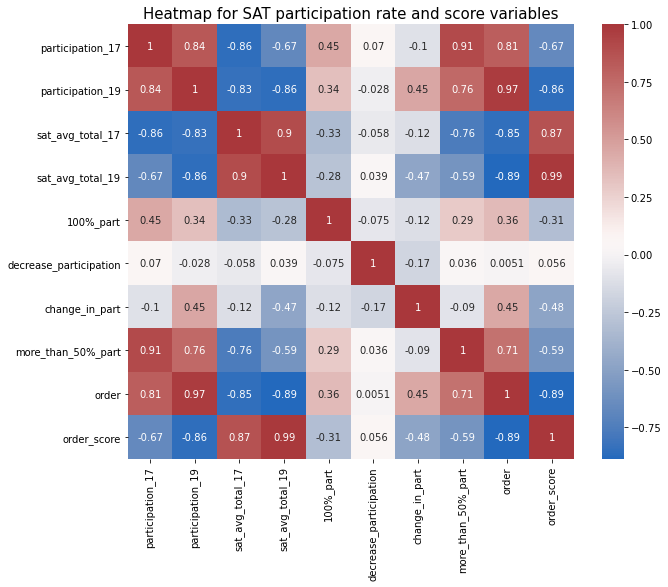

In [64]:
plt.figure(figsize=(10,8))
plt.title("Heatmap for SAT participation rate and score variables", fontsize=15)
sns.heatmap(sat.corr(),annot=True, cmap="vlag");

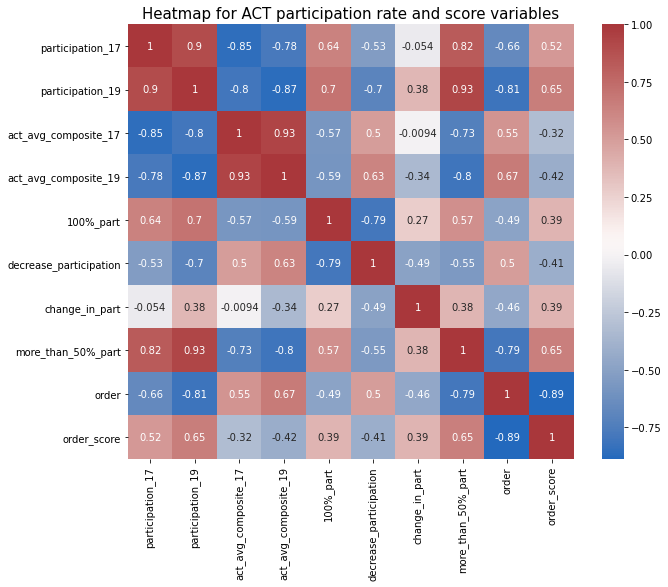

In [65]:
plt.figure(figsize=(10,8))
plt.title("Heatmap for ACT participation rate and score variables", fontsize=15)
sns.heatmap(act.corr(),annot=True, cmap="vlag");

The heatmap above suggests that:
- The participation rate in the respective tests are correlated with the past or future partipatition rates by the states.
- The mean test scores are correlated with the past or future mean test scores achieved by the states.
- There are also some correlation between the participation rate and test score variables.

### Visualise distributions using histograms

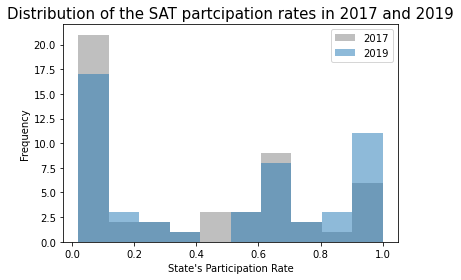

In [66]:
plt.hist(sat["participation_17"], bins=10, alpha=0.5, color='grey', label=2017)
plt.hist(sat["participation_19"], bins=10, alpha=0.5, label=2019)

plt.title("Distribution of the SAT partcipation rates in 2017 and 2019", fontsize=15)
plt.ylabel("Frequency")
plt.xlabel("State's Participation Rate")
plt.legend();


1) Based on the histogram above, the distribution of state participation in SAT seems like a tri-modal distribution. Many states observed between the:
- 0% - 10%;
- 60% - 70%; and,
- 90% - 100%  participation rates.

2) Notably, more states have moved out of the group with 0% - 10% participation rate in 2019. More have also moved into the 90%-100% group.

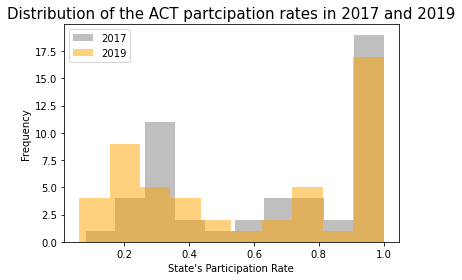

In [67]:
plt.hist(act["participation_17"], bins=10, alpha=0.5, color='grey', label=2017)
plt.hist(act["participation_19"], bins=10, alpha=0.5, color='orange', label=2019)

plt.title("Distribution of the ACT partcipation rates in 2017 and 2019", fontsize=15)
plt.ylabel("Frequency")
plt.xlabel("State's Participation Rate")
plt.legend();

Based on the histogram above, the distribution of state participation in ACT more closely resembles a bimodal distribution. 

In 2019, many states observed between the:
- 10% - 20%; and
- 90% - 100%  participation rates.


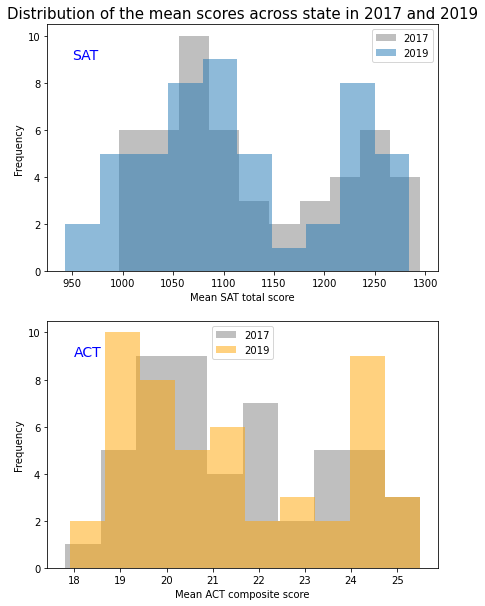

In [68]:
fig, ax = plt.subplots(2, figsize=(7,10))

ax[0].hist(sat["sat_avg_total_17"], bins=10, alpha=0.5, color='grey', label=2017)
ax[0].hist(sat["sat_avg_total_19"], bins=10, alpha=0.5, label=2019)

ax[0].set_title("Distribution of the mean scores across state in 2017 and 2019", fontsize=15)
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Mean SAT total score")
ax[0].text(950,9, "SAT", fontsize=14, color="blue");
ax[0].legend()

ax[1].hist(act["act_avg_composite_17"], bins=10, alpha=0.5, color='grey', label=2017)
ax[1].hist(act["act_avg_composite_19"], bins=10, alpha=0.5, color="orange", label=2019)

ax[1].text(18,9, "ACT", fontsize=14, color="blue")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Mean ACT composite score")
ax[1].legend();

**Key observations:**
- The distributions of both the mean SAT total and mean ACT composite scores are bimodal. 
- The 2019 SAT score distribution shifted to the left. It suggests that **students were performing more poorly on the SAT**; both the lowest and highest mean scores were lower than before. 
- This may be worrying as we do not see a similar leftward shift of score distribution for ACT in 2019. 

### Boxplots

<ipython-input-69-3033a9d54fd3>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_plot.set(title="States' Test Participation Rates in 2017",


,min,25%,50%,75%,max,mean
test,,,,,,
ACT,8.0,31.0,71.0,100.0,100.0,65.9
SAT,2.0,4.0,34.0,65.0,100.0,38.6


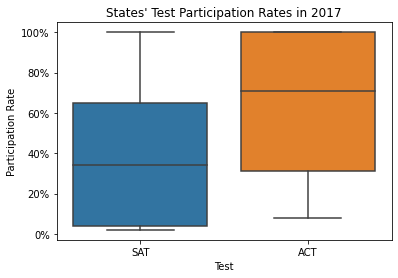

In [69]:
box_plot = sns.boxplot(x="test", y="participation_17", data=sat_act)
box_plot.set(title="States' Test Participation Rates in 2017",
             xlabel='Test',
             ylabel="Participation Rate", 
             yticklabels=[ np.nan, "0%", "20%", "40%", "60%", "80%", "100%"]);

sat_act.groupby("test")["participation_17"].describe()[["min", "25%", "50%", "75%", "max", "mean"]].apply(lambda x: x*100).round(1)

<ipython-input-70-22d8bca14ec6>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_plot.set(title="States' Test Participation Rates in 2019",


,min,25%,50%,75%,max,mean
test,,,,,,
ACT,6.0,24.2,58.5,100.0,100.0,59.2
SAT,2.0,5.3,52.5,81.8,100.0,48.2


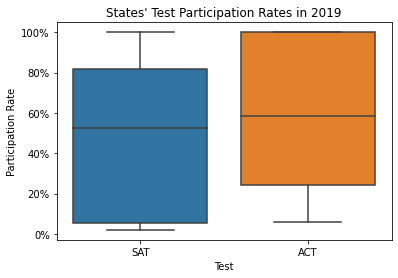

In [70]:
box_plot = sns.boxplot(x="test", y="participation_19", data=sat_act)
box_plot.set(title="States' Test Participation Rates in 2019",
             xlabel='Test',
             ylabel="Participation Rate", 
             yticklabels=[ np.nan, "0%", "20%", "40%", "60%", "80%", "100%"]);

sat_act.groupby("test")["participation_19"].describe()[["min", "25%", "50%", "75%", "max", "mean"]].apply(lambda x: x*100).round(1)

The boxplots above show a significant improvement in state participation rates for SAT and a decline in state participation rate for ACT in 2019. 

### Scatterplots

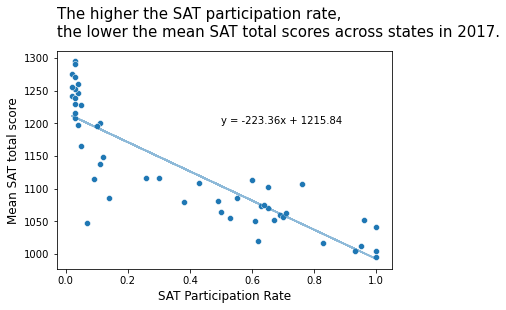

In [71]:
sat_scatter_17 = sns.scatterplot(data=sat, x="participation_17", y="sat_avg_total_17")

### plot best-fit line
m, b = np.polyfit(sat["participation_17"], sat["sat_avg_total_17"].astype(float), 1)
plt.plot(sat["participation_17"], m*sat["participation_17"] + b, alpha=0.5)
plt.text(0.5, 1200, f'y = {m:.2f}x + {b:.2f}')

sat_scatter_17.set_title("The higher the SAT participation rate, \nthe lower the mean SAT total scores across states in 2017.", fontsize=15, loc="left", pad=15)
sat_scatter_17.set_ylabel("Mean SAT total score", fontsize=12)
sat_scatter_17.set_xlabel("SAT Participation Rate", fontsize=12);

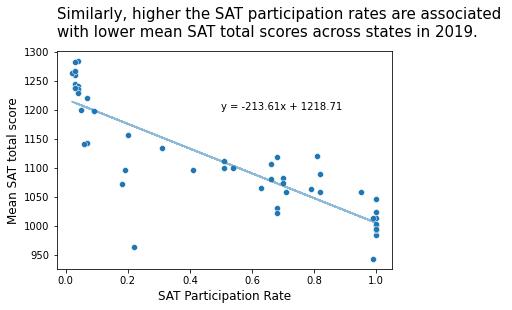

In [72]:
sat_scatter_19 = sns.scatterplot(data=sat, x="participation_19", y="sat_avg_total_19")

### plot best-fit line
m, b = np.polyfit(sat["participation_19"], sat["sat_avg_total_19"], 1)
plt.plot(sat["participation_19"], m*sat["participation_19"] + b, alpha=0.5)
plt.text(0.5, 1200, f'y = {m:.2f}x + {b:.2f}')

sat_scatter_19.set_title("Similarly, higher the SAT participation rates are associated \nwith lower mean SAT total scores across states in 2019.", fontsize=15, loc="left", pad=15)
sat_scatter_19.set_ylabel("Mean SAT total score", fontsize=12)
sat_scatter_19.set_xlabel("SAT Participation Rate", fontsize=12);

While the negative correlation between state participation rate and mean SAT total scores was less strong in 2019 (i.e. slope of best-fit line has decreased), it is still **concerning to see that many states with full participation rates are among the states with the worst mean SAT total scores**. 

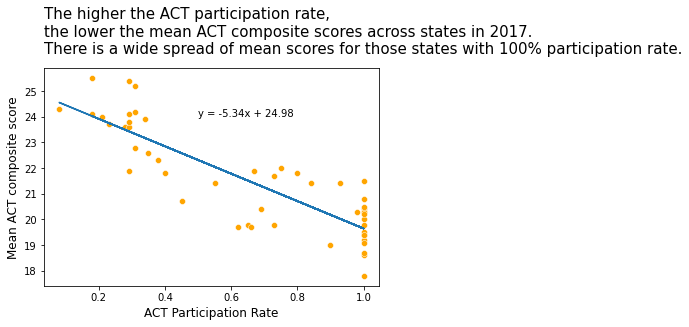

In [73]:
act_scatter_17 = sns.scatterplot(data=act, x="participation_17", y="act_avg_composite_17", color='orange')

### plot best-fit line
m, b = np.polyfit(act["participation_17"], act["act_avg_composite_17"], 1)
plt.plot(act["participation_17"], m*act["participation_17"] + b)
plt.text(0.5, 24, f'y = {m:.2f}x + {b:.2f}')

act_scatter_17.set_title("The higher the ACT participation rate, \nthe lower the mean ACT composite scores across states in 2017. \nThere is a wide spread of mean scores for those states with 100% participation rate.", fontsize=15, loc="left", pad=15)
act_scatter_17.set_ylabel("Mean ACT composite score", fontsize=12)
act_scatter_17.set_xlabel("ACT Participation Rate", fontsize=12);

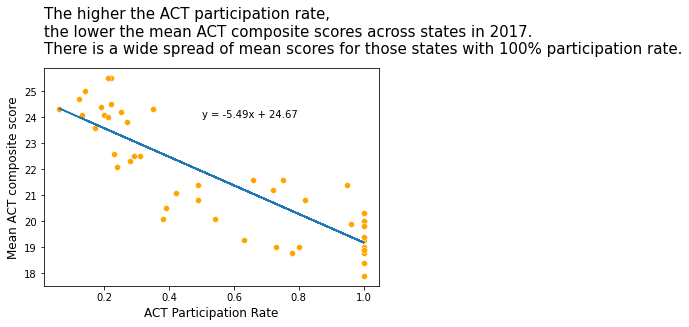

In [74]:
act_scatter_19 = sns.scatterplot(data=act, x="participation_19", y="act_avg_composite_19", color='orange')

### plot best-fit line
m, b = np.polyfit(act["participation_19"], act["act_avg_composite_19"], 1)
plt.plot(act["participation_19"], m*act["participation_19"] + b)
plt.text(0.5, 24, f'y = {m:.2f}x + {b:.2f}')

act_scatter_19.set_title("The higher the ACT participation rate, \nthe lower the mean ACT composite scores across states in 2017. \nThere is a wide spread of mean scores for those states with 100% participation rate.", fontsize=15, loc="left", pad=15)
act_scatter_19.set_ylabel("Mean ACT composite score", fontsize=12)
act_scatter_19.set_xlabel("ACT Participation Rate", fontsize=12);

There is a slightly stronger the negative correlation between state participation rate and mean ACT composite score in 2019 (i.e. slope of best-fit line has increased). This may be attributed to the decline in mean ACT composite score among the states with 100% participation rate in ACT. 

## Recommendations


1) Many states with low participation rates in SAT in 2019 had high participation rates in ACT. To boost future participation rates, **College Board can first target marketing or partnership efforts in the states that had shown a notable decline in their ACT participation rates**\*:

 > Missouri, Alaska, Minnesota, South Dakota
 
 \*see bar chart on participation rates under trend investigation above
 
 
2) With the decline in mean SAT test scores across states in 2019, College Board should focus on improving students' access to test preparation resources so that students will obtain better test performance in the future. To start, **College Board can target the states with 100% SAT participation rates in 2019, but lower mean SAT total scores than the overall mean of all states**: 

 > Delaware, Idaho, Rhode Island, Florida, Michigan, Illinois, Colorado, Connecticut

In [75]:
sat[["state", "participation_19", "sat_avg_total_19"]][(sat["participation_19"]==1) & (sat["sat_avg_total_19"] < sat["sat_avg_total_19"].mean())].sort_values("sat_avg_total_19")

,state,participation_19,sat_avg_total_19
7,Delaware,1.0,985
11,Idaho,1.0,993
38,Rhode Island,1.0,995
8,Florida,1.0,999
21,Michigan,1.0,1003
12,Illinois,1.0,1013
5,Colorado,1.0,1024
6,Connecticut,1.0,1046
